In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
%cd "/content/drive/MyDrive/8° Semestre/IA M2 Benji"
!ls

/content/drive/MyDrive/8° Semestre/IA M2 Benji
 augmented  'Copia de Model Tunning.ipynb'   Dataset2_1   images


# Data Augmentation

usamos ImageDataGenerator para generar imagenes nuevas en el ram mientras entrenamos para no desperdiciar espacio.

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir = 'Dataset2_1'
train_dir = os.path.join(base_dir,'Train')
test_dir = os.path.join(base_dir, 'Test')

class_names = sorted(os.listdir(train_dir))
class_labels = {class_name: i for i, class_name in enumerate(class_names)}

train_datagen = ImageDataGenerator(
							rescale = 1./255,
							rotation_range = 60,
						#	width_shift_range = 0.2,
						#	height_shift_range = 0.2,
						#	shear_range = 0.3,
							zoom_range = 0.3,
							horizontal_flip = True,
							preprocessing_function=tf.image.rgb_to_grayscale,
							validation_split=0.2
							)

para ello tenemos que asignar una fuente base de imágenes a modificar, en este caso tomamos las de el directorio de train, en este caso solo estamos tomando una imagen y estamos mostrando como se generarían 5 imágenes diferentes:

Found 22400 images belonging to 28 classes.
Found 5600 images belonging to 28 classes.


<Figure size 640x480 with 0 Axes>

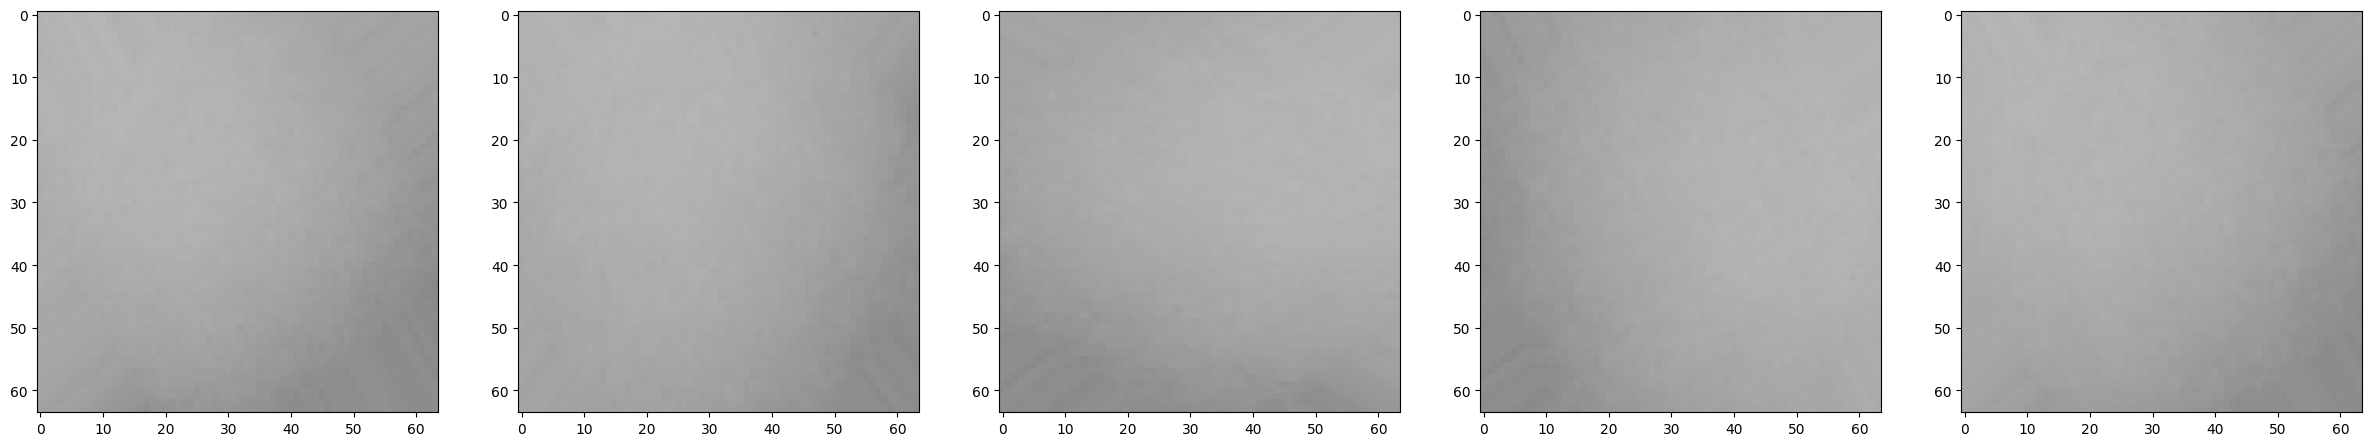

In [29]:
import matplotlib.pyplot as plt

train_generator = train_datagen.flow_from_directory(
		 train_dir,
		 target_size = (64, 64),
		 batch_size = 1,
		 #class_mode ='binary',
		 class_mode ='categorical',
		 subset='training',
		 classes=class_names,  # Pass class labels
		 shuffle=True,
		 seed=42
		 )

validation_generator = train_datagen.flow_from_directory(
		 'Dataset2_1/Train',
		 target_size=(64, 64),
		 batch_size=8,
		 class_mode='categorical',
		 subset='validation',
		 classes=class_names,  # Pass class labels
		 shuffle=True,
		 seed=42
		 )

plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, 5, figsize=(30, 8))

for i in range(5) :
  axarr[i].imshow(train_generator[0][0][0], cmap='gray')

En este caso estamos tomando 8 imágenes y estomos modificando todas 1 vez cada una y las mostramos a manera de ejemplo.

Found 22400 images belonging to 28 classes.
(8, 64, 64, 3)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 0.]]


<Figure size 640x480 with 0 Axes>

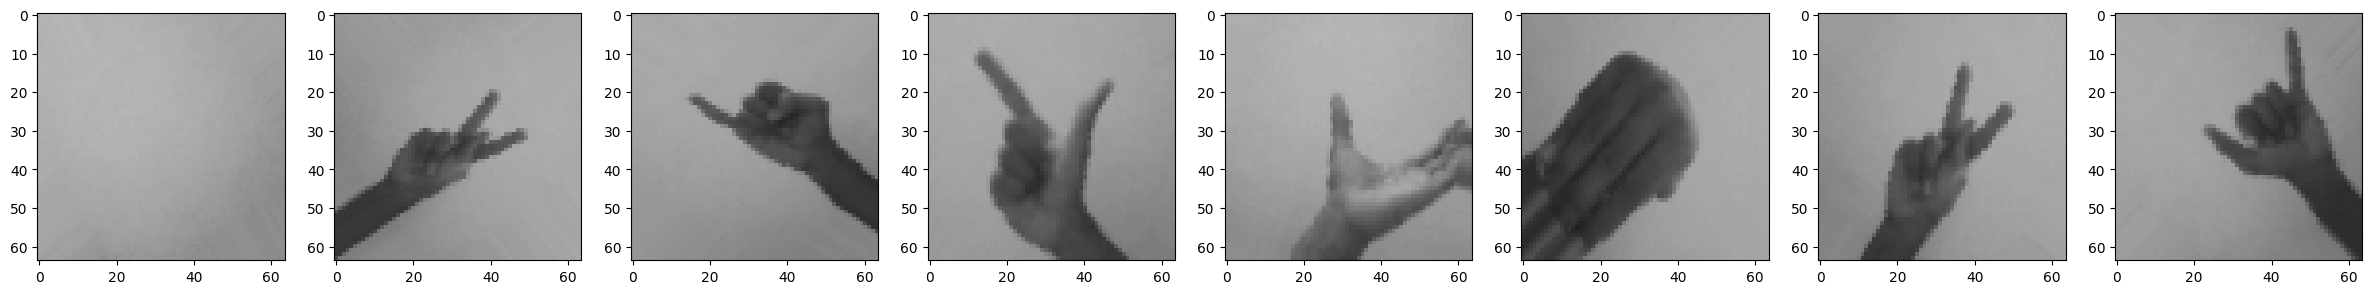

In [30]:
train_generator = train_datagen.flow_from_directory(
		 train_dir,
		 target_size = (64, 64),
		 batch_size = 8,
		 #class_mode ='binary',
		 class_mode ='categorical',
		 subset='training',
		 classes=class_names,  # Pass class labels
		 shuffle=True,
		 seed=42
		 )

images, labels = train_generator[0]

print(images.shape)
print(labels)

plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, images.shape[0], figsize=(30, 4))

for i in range(images.shape[0]) :
  axarr[i].imshow(images[i])


También podemos configurar la generación de imágenes para que cada una se salve en el disco duro, de esta forma podemos ver posteriormente con qué imágenes entrenó el modelo.

In [ ]:
"""path = "/content/drive/MyDrive/8° Semestre/IA M2 Benji/Dataset2_1"

train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (150, 150),
							batch_size = 8,
							#class_mode ='binary',
							class_mode ='categorical',
							save_to_dir= path + '/Augmented',
              save_prefix='aug',
              save_format='png'
							)"""

'path = "/content/drive/MyDrive/8° Semestre/IA M2 Benji/Dataset2_1"\n\ntrain_generator = train_datagen.flow_from_directory(\n\t\t\t\t\t\t\ttrain_dir,\n\t\t\t\t\t\t\ttarget_size = (150, 150),\n\t\t\t\t\t\t\tbatch_size = 8,\n\t\t\t\t\t\t\t#class_mode =\'binary\',\n\t\t\t\t\t\t\tclass_mode =\'categorical\',\n\t\t\t\t\t\t\tsave_to_dir= path + \'/Augmented\',\n              save_prefix=\'aug\',\n              save_format=\'png\'\n\t\t\t\t\t\t\t)'

Esta es una red neuronal convolutiva:

In [31]:
from tensorflow.keras import optimizers, callbacks
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.optimizers.schedules import LearningRateSchedule

"""initial_learning_rate = 1e-4
decay_steps = len(os.listdir(train_dir)) // 8
decay_rate = 0.75"""

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(28, activation='softmax')
])

model.summary()
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 6, 6, 128)        

In [20]:
"""class LRTuningCallback(callbacks.Callback):
    def on_train_begin(self, logs=None):
        self.lr = []
        self.loss = []

    def on_epoch_end(self, epoch, logs=None):
        current_lr = self.model.optimizer.lr
        current_loss = logs.get('loss')
        self.lr.append(current_lr)
        self.loss.append(current_loss)"""

"class LRTuningCallback(callbacks.Callback):\n    def on_train_begin(self, logs=None):\n        self.lr = []\n        self.loss = []\n\n    def on_epoch_end(self, epoch, logs=None):\n        current_lr = self.model.optimizer.lr\n        current_loss = logs.get('loss')\n        self.lr.append(current_lr)\n        self.loss.append(current_loss)"

In [32]:
def early_stopping(monitor='val_loss', min_delta=0, patience=5):
    """
    Implements early stopping based on the given monitor metric.

    Parameters:
    - monitor (str): The metric to monitor. Can be 'val_loss' or 'val_accuracy'.
    - min_delta (float): Minimum change in the monitored metric to qualify as improvement.
    - patience (int): Number of epochs with no improvement after which training will be stopped.

    Returns:
    - keras.callbacks.EarlyStopping: Early stopping callback.
    """
    return callbacks.EarlyStopping(monitor=monitor, min_delta=min_delta, patience=patience, restore_best_weights=True)

Epoch 1/15
2800/2800 [==============================] - 453s 161ms/step - loss: 2.3390 - accuracy: 0.2858 - val_loss: 1.2532 - val_accuracy: 0.5727
Epoch 2/15
2800/2800 [==============================] - 447s 160ms/step - loss: 1.0213 - accuracy: 0.6496 - val_loss: 0.8989 - val_accuracy: 0.6898
Epoch 3/15
2800/2800 [==============================] - 452s 162ms/step - loss: 0.7458 - accuracy: 0.7422 - val_loss: 0.6599 - val_accuracy: 0.7912
Epoch 4/15
2800/2800 [==============================] - 452s 161ms/step - loss: 0.5913 - accuracy: 0.7969 - val_loss: 0.6441 - val_accuracy: 0.7816
Epoch 5/15
2800/2800 [==============================] - 440s 157ms/step - loss: 0.4893 - accuracy: 0.8324 - val_loss: 0.6357 - val_accuracy: 0.8016
Epoch 6/15
2800/2800 [==============================] - 435s 155ms/step - loss: 0.4275 - accuracy: 0.8549 - val_loss: 0.4327 - val_accuracy: 0.8618
Epoch 7/15
2800/2800 [==============================] - 417s 149ms/step - loss: 0.3711 - accuracy: 0.8751 - val_

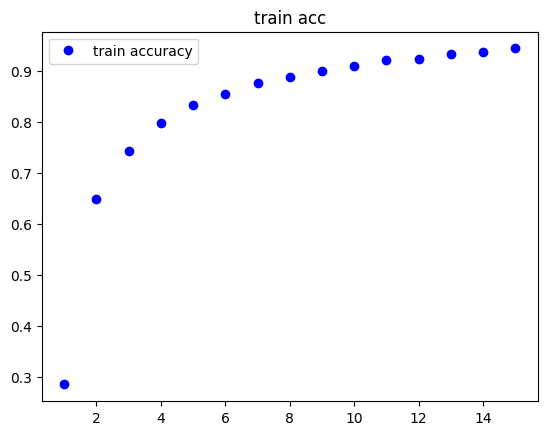

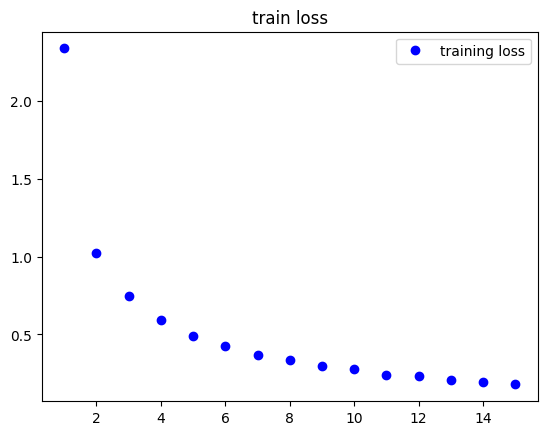

In [22]:
#early_stop = early_stopping(monitor='loss', patience=3)  # Monitor training loss
early_stop = early_stopping(monitor='val_loss', patience=3)  # Monitor validation loss
history = model.fit(train_generator, epochs=15, validation_data=validation_generator, callbacks=[early_stop])
"""history = model.fit(
						train_generator,
						epochs = 15,
						callbacks=[early_stop])"""

acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs,acc,'bo',label='train accuracy')
plt.title('train acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'bo', label ='training loss')
plt.title('train loss')
plt.legend()

In [24]:
test_datagen = ImageDataGenerator(
		 rescale=1./255,
		 preprocessing_function=tf.image.rgb_to_grayscale,
		 )  # Normalize pixel values
test_generator = test_datagen.flow_from_directory(
		 test_dir,
		 target_size=(64, 64),
		 batch_size=20,
		 class_mode='categorical',
		 classes=class_names,
		 shuffle=False
		 )

# Calculate the number of steps needed to iterate over the entire test dataset
num_test_samples = len(test_generator.filenames)
num_test_steps = num_test_samples // test_generator.batch_size

# Evaluate the model on the test data generator
test_loss, test_acc = model.evaluate(test_generator, steps=num_test_steps)
print('\nTest accuracy:', test_acc)

Found 6900 images belonging to 28 classes.
345/345 [==============================] - 2441s 7s/step - loss: 0.5593 - accuracy: 0.8584

Test accuracy: 0.8584057688713074


In [26]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Get true labels and filenames
true_labels = test_generator.classes
filenames = test_generator.filenames

# Generate predictions for test data
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

# Print predictions
print("Filename\t\t\tTrue Label\tPredicted Label")
print("------------------------------------------------------------")
for filename, true_label, predicted_label in zip(filenames, true_labels, predicted_labels):
    print("{:<30}\t{}\t\t{}".format(filename, true_label, predicted_label))

Se truncaron las últimas líneas 5000 del resultado de transmisión.
H/1155.jpg                    	7		5
H/1156.jpg                    	7		6
H/1157.jpg                    	7		14
H/1158.jpg                    	7		18
H/1159.jpg                    	7		9
H/1160.jpg                    	7		14
H/1161.jpg                    	7		2
H/1162.jpg                    	7		9
H/1163.jpg                    	7		24
H/1164.jpg                    	7		20
H/1165.jpg                    	7		6
H/1166.jpg                    	7		22
H/1167.jpg                    	7		10
H/1168.jpg                    	7		22
H/1169.jpg                    	7		18
H/1170.jpg                    	7		2
H/1171.jpg                    	7		4
H/1172.jpg                    	7		8
H/1173.jpg                    	7		26
H/1174.jpg                    	7		1
H/1175.jpg                    	7		18
H/1176.jpg                    	7		3
H/1177.jpg                    	7		22
H/1178.jpg                    	7		12
H/1179.jpg                    	7		8
H/1180.jpg          

In [27]:
# Get the class labels from the test data generator
class_labels = list(test_generator.class_indices.keys())

# Generate predictions for the test data
predictions = model.predict(test_generator)

# Print out probabilities for each class for each image
for i in range(len(predictions)):
    print("Image:", test_generator.filenames[i])
    print("True Label:", class_labels[true_labels[i]])
    print("Predicted Probabilities:")
    for j in range(len(class_labels)):
        print("{}: {:.2f}%".format(class_labels[j], predictions[i][j] * 100))
    print("------------------------------------------")

Se truncaron las últimas líneas 5000 del resultado de transmisión.
T: 0.00%
U: 0.00%
V: 0.00%
W: 0.00%
X: 0.00%
Y: 0.00%
Z: 0.00%
------------------------------------------
Image: Z/1099.jpg
True Label: Z
Predicted Probabilities:
A: 0.00%
B: 0.00%
C: 0.00%
D: 0.00%
E: 0.00%
F: 0.00%
G: 100.00%
H: 0.00%
I: 0.00%
J: 0.00%
K: 0.00%
L: 0.00%
M: 0.00%
N: 0.00%
Nothing: 0.00%
O: 0.00%
P: 0.00%
Q: 0.00%
R: 0.00%
S: 0.00%
Space: 0.00%
T: 0.00%
U: 0.00%
V: 0.00%
W: 0.00%
X: 0.00%
Y: 0.00%
Z: 0.00%
------------------------------------------
Image: Z/1100.jpg
True Label: Z
Predicted Probabilities:
A: 0.00%
B: 0.00%
C: 0.00%
D: 0.00%
E: 0.00%
F: 0.00%
G: 0.00%
H: 0.00%
I: 0.00%
J: 0.00%
K: 0.00%
L: 100.00%
M: 0.00%
N: 0.00%
Nothing: 0.00%
O: 0.00%
P: 0.00%
Q: 0.00%
R: 0.00%
S: 0.00%
Space: 0.00%
T: 0.00%
U: 0.00%
V: 0.00%
W: 0.00%
X: 0.00%
Y: 0.00%
Z: 0.00%
------------------------------------------
Image: Z/1101.jpg
True Label: Z
Predicted Probabilities:
A: 0.00%
B: 0.00%
C: 0.00%
D: 0.05%
E: 0.0

In [25]:
test_imgs = test_generator[0][0]
test_labels = test_generator[0][1]


predictions = model.predict(test_imgs)
classes_x = np.argmax(predictions,axis=1)
classes_x
test_labels_int = np.argmax(test_labels, axis=1)

1/1 [==============================] - 0s 250ms/step


In [ ]:
print('Model         ', 'test loss            ', ' test accuracy ')
print('Original      ', test_loss, '   ', test_acc)
#print('More Layers   ', test_loss_cnn, '   ', test_acc_cnn)
#print('Transfer VGG  ', test_loss_vgg, '  ', test_acc_vgg)


from tensorflow.math import confusion_matrix

mat = confusion_matrix(classes_x, test_labels_int)
print('         ', 'label neg ', ' label pos')
print('pred neg    ', np.array(mat[0][0]), "        ", np.array(mat[0][1]))
print('pred pos    ', np.array(mat[1][0]), "         ", np.array(mat[1][1]))

Model          test loss              test accuracy 
Original       530.7908935546875     0.1875
          label neg   label pos
pred neg     0          0
pred pos     0           0


1 model.save("hermno.keras")

model = models.load_model(hermno.keras)